In [1]:
!wget -q -O test.jpg "https://drive.google.com/uc?export=download&id=1BlvTJELQoVrLmfzAWD_MeSTUToRx7C-4"
import cv2
import matplotlib.pyplot as plt

In [2]:
# Load the input image
input_image_path = "test.jpg"  # Change this to your input image path
try:
    image = cv2.imread(input_image_path)
    if image is None:
        raise FileNotFoundError(f"Unable to load image: {input_image_path}")
except Exception as e:
    print(f"Error: {e}")
    exit()

In [3]:
# Function to check if a face is detected in the image
def check_face(image):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    return len(faces) > 0

# Check if a face is detected in the image
face_detected = check_face(image)

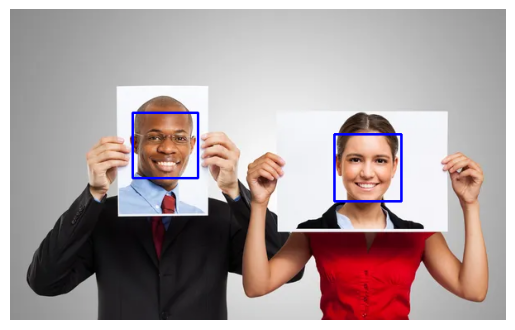

Face detected and image with square around the face displayed.


In [4]:
# If a face is detected, draw a square around it
if face_detected:
    # Draw a square around each detected face
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Display the image with squares around detected faces
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    print("Face detected and image with square around the face displayed.")
else:
    print("No face detected in the image.")